In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#with open('logjams2012_test_types_python.csv', newline='') as f:
with open('logjams2014_testtypes.csv', newline='') as f:
    data = [row for row in csv.DictReader(f)] #read excel into a dictionary
    
#convert into numbers
for x in data:
    x['rkm']  = float(x['rkm'])
    x['size'] = float(x['size'])
    
#print(data)

In [7]:
#unique_types = list(set([x['type'] for x in data])) 
unique_types = ['Bar Apex', 'Stumps', 'Key Pieces', 'Meander', 'Channel Spanning','Boulders', 'Live Trees']
print('unique types are:',unique_types)

#Breaks list of dictionaries into a dictionary in which each
#key is a type of log jam and each value is a list of dictionaries
#specifying each log jam of that type
allsortedtypes = {}
for y in unique_types:
    allsortedtypes[y] = [x for x in data if x['type'] == y]
#print(allsortedtypes)

unique types are: ['Bar Apex', 'Stumps', 'Key Pieces', 'Meander', 'Channel Spanning', 'Boulders', 'Live Trees']


In [8]:
# filters all logjam sizes between start and end for a given lj type
def rkm_filter(ljtype, start, end):
    return [x for x in data if start<=x['rkm'] and x['rkm'] < end
             and x['type'] == ljtype]
d = rkm_filter('Bar Apex', 2, 6)
# output is a list of dictionaries    
#print(d)

In [9]:
# sums up logjam size and counts logjams by river break sections & by type
#breaks = [0, 2.5,10]
breaks = np.arange(0,25,0.5)
test_type = 'Bar Apex'

def type_section_aggregator(o_breaks, o_type):
    o_location = []
    o_totalsize = []
    o_numberoflogjams = []
    for i in range(len(o_breaks)-1):
        p = rkm_filter(o_type ,o_breaks[i],o_breaks[i+1])
        tot = 0
        for j in p:
            tot = tot + j.get('size')
        o_location.append(str(o_breaks[i]) + ' to ' + str(o_breaks[i+1]))
        o_totalsize.append(tot)
        o_numberoflogjams.append(len(p))
    return(o_type, o_location, o_totalsize, o_numberoflogjams)

f = type_section_aggregator(breaks, test_type)
print(f)

('Bar Apex', ['0.0 to 0.5', '0.5 to 1.0', '1.0 to 1.5', '1.5 to 2.0', '2.0 to 2.5', '2.5 to 3.0', '3.0 to 3.5', '3.5 to 4.0', '4.0 to 4.5', '4.5 to 5.0', '5.0 to 5.5', '5.5 to 6.0', '6.0 to 6.5', '6.5 to 7.0', '7.0 to 7.5', '7.5 to 8.0', '8.0 to 8.5', '8.5 to 9.0', '9.0 to 9.5', '9.5 to 10.0', '10.0 to 10.5', '10.5 to 11.0', '11.0 to 11.5', '11.5 to 12.0', '12.0 to 12.5', '12.5 to 13.0', '13.0 to 13.5', '13.5 to 14.0', '14.0 to 14.5', '14.5 to 15.0', '15.0 to 15.5', '15.5 to 16.0', '16.0 to 16.5', '16.5 to 17.0', '17.0 to 17.5', '17.5 to 18.0', '18.0 to 18.5', '18.5 to 19.0', '19.0 to 19.5', '19.5 to 20.0', '20.0 to 20.5', '20.5 to 21.0', '21.0 to 21.5', '21.5 to 22.0', '22.0 to 22.5', '22.5 to 23.0', '23.0 to 23.5', '23.5 to 24.0', '24.0 to 24.5'], [0.0, 140.0, 180.0, 262.0, 1872.0, 847.0, 0, 481.0, 0, 1183.0, 375.0, 0, 216.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2124.0, 465.0, 0, 643.0, 72.0, 0, 0, 286.0, 0, 0, 0, 266.0, 578.0, 1074.0, 96.0, 180.0, 1212.0, 84.0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8,

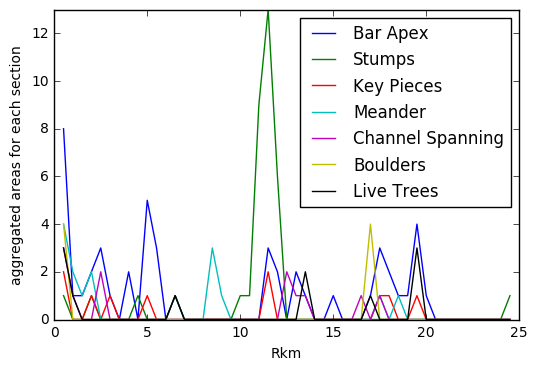

In [10]:
# setting up the all types along rkm dataframe
df_alltypes = pd.DataFrame({ 'Rkm' : pd.Series(breaks[1:], index = f[1])})
for ljtype in unique_types:
    df_alltypes[ljtype] = type_section_aggregator(breaks, ljtype)[3]
    plt.plot(df_alltypes.values[:,0],type_section_aggregator(breaks, ljtype)[3], label = ljtype)
#print(df_alltypes)
plt.ylabel('aggregated areas for each section')
plt.xlabel('Rkm')
plt.legend()
plt.axis([0, 25, 0, 13])
plt.show()
# print(df_alltypes.values[:,0])

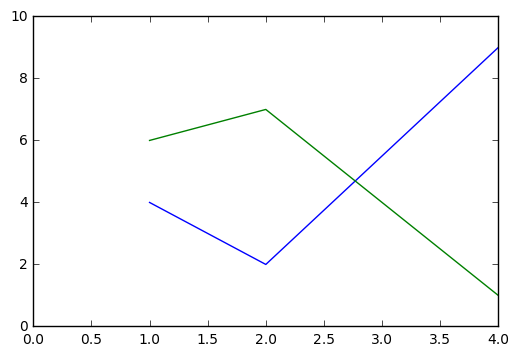

In [11]:
#plotting 
testrkm = [1,2,4]
plt.plot(testrkm, [4, 2,9])
plt.plot(testrkm,[6,7,1])
plt.axis([0, 4, 0, 10])
plt.show()

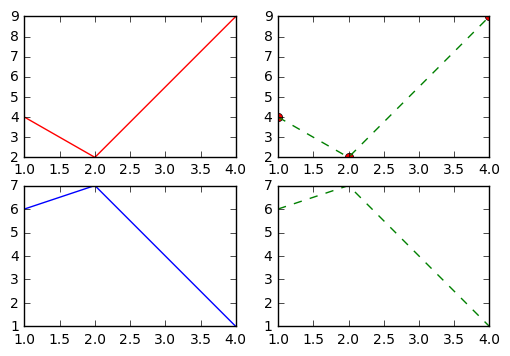

In [45]:
x = [1,2,4]
y = [4,2,9]
z = [6,7,1]
f, axarr = plt.subplots(2,2)
axarr[0,0].plot(x, y, 'r')
axarr[0,1].plot(x, y, 'ro', x, y, 'g--')
axarr[1,0].plot(x, z)
axarr[1,1].plot(x, z,'g--')
plt.show()

In [ ]:
#a.sort(key = lambda x: x['rkm'])
print('k')